# Importing important libraries for EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Striping space from the column names

In [6]:
data.columns = list(data.columns.str.strip())

In [4]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Numerical and categorical columns segregation

In [7]:
num_col = data.select_dtypes(include='number').columns.to_list()
cat_col = data.select_dtypes(exclude='number').columns.to_list()

# checking for outliers

<h4 style="color: red;">histogram and kde ploting of all numerical features</h4>

Skewness of loan_id: 0.0
Skewness of no_of_dependents: -0.01797054296784964
Skewness of income_annum: -0.012814425096650109
Skewness of loan_amount: 0.30872388482299223
Skewness of loan_term: 0.036358907356478495
Skewness of cibil_score: -0.009039277330065707
Skewness of residential_assets_value: 0.9784505965115631
Skewness of commercial_assets_value: 0.9577908874986114
Skewness of luxury_assets_value: 0.3222075028955774
Skewness of bank_asset_value: 0.5607250089736816


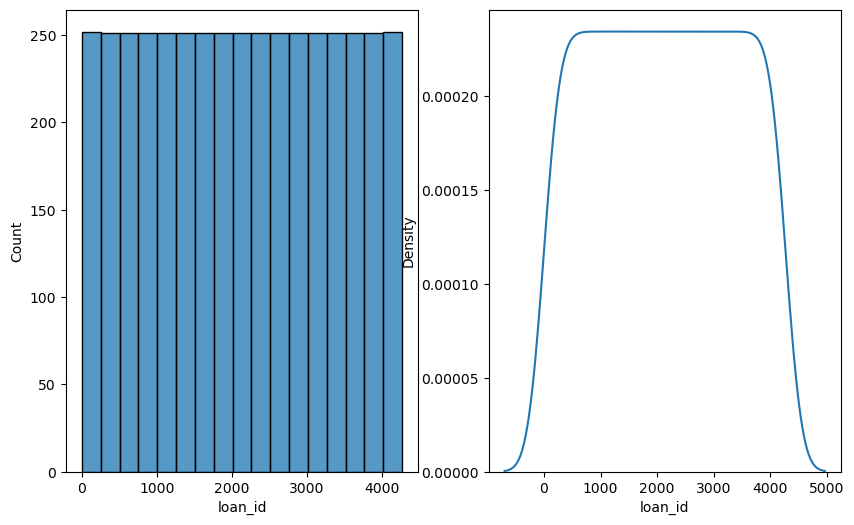

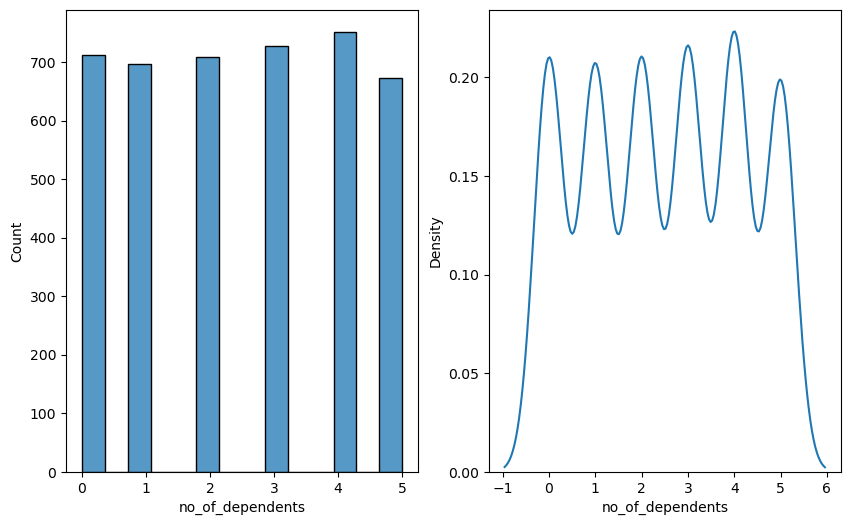

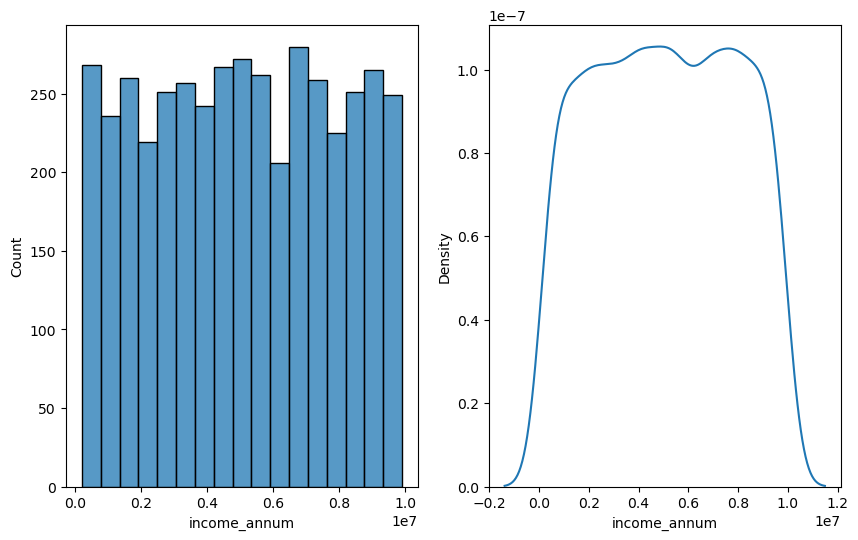

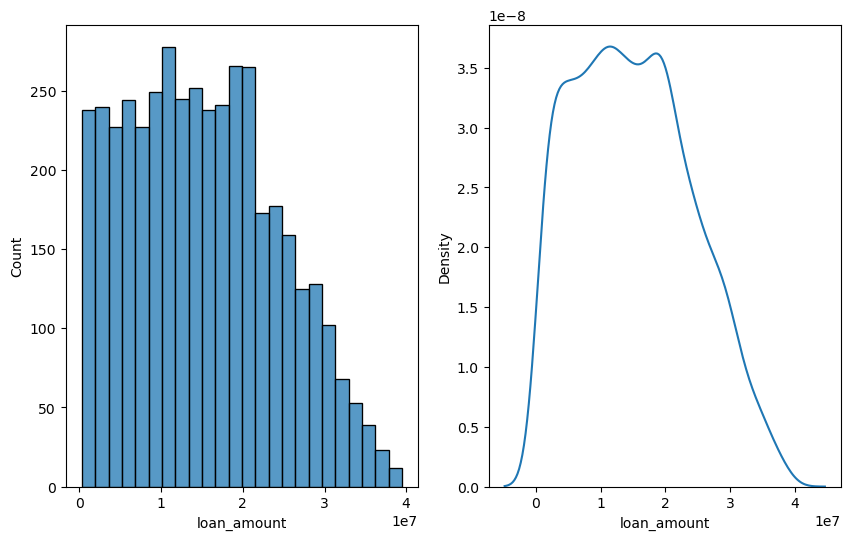

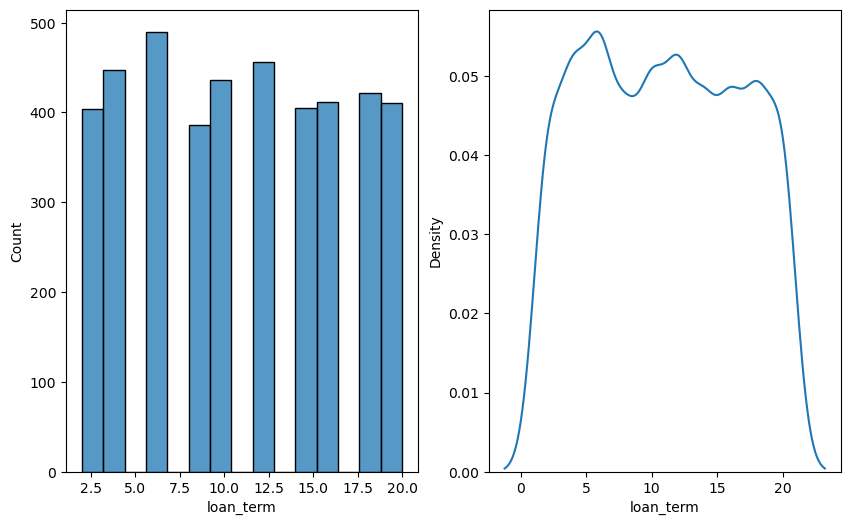

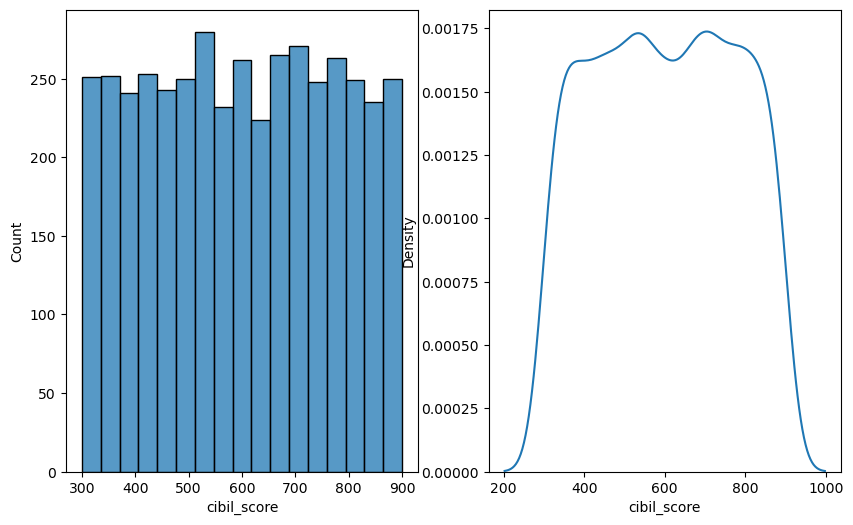

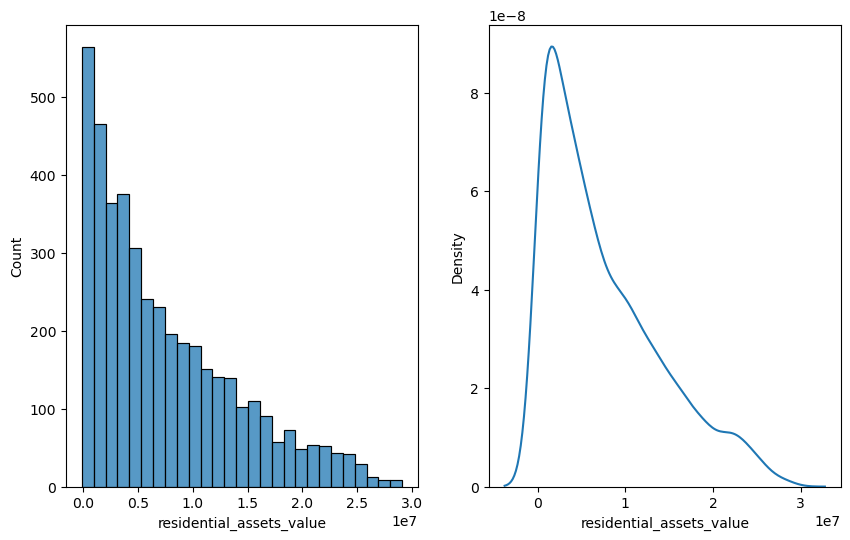

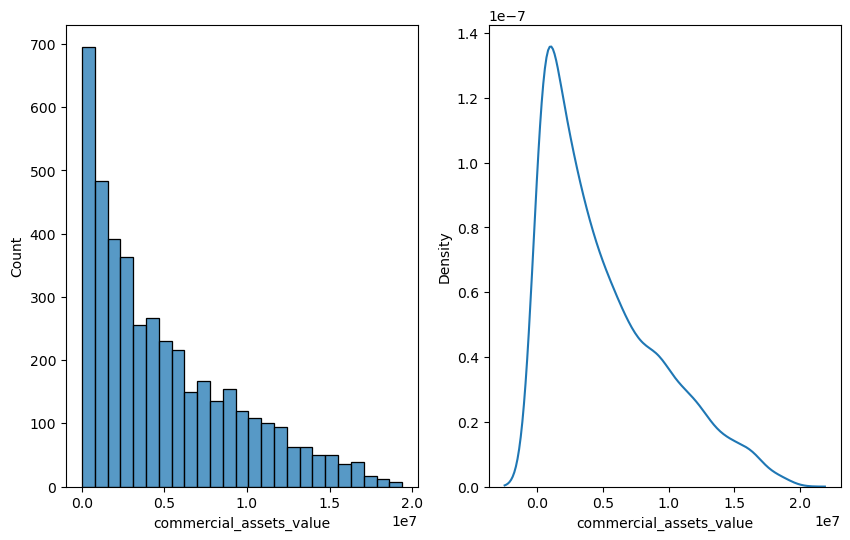

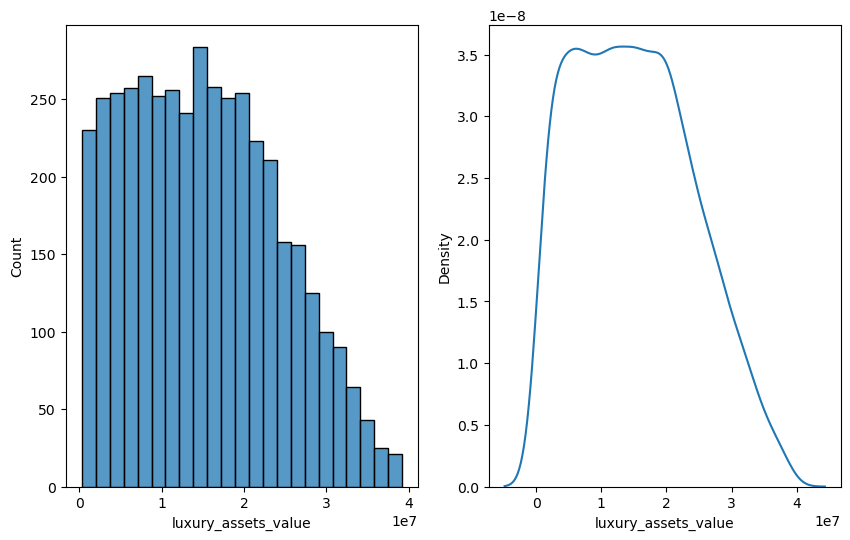

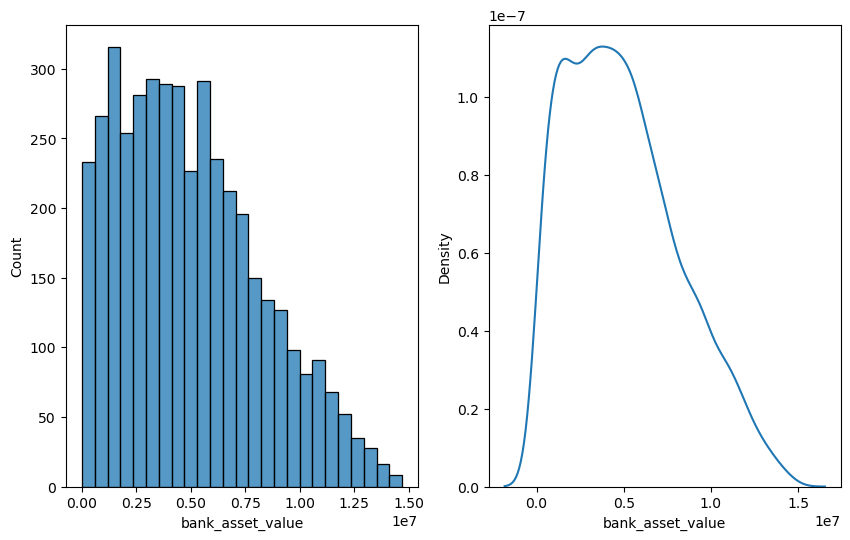

In [22]:
for col in num_col:
    fig,ax= plt.subplots(1,2,figsize=(10,6))

    sns.histplot(data[col], kde=False ,ax=ax[0])
    sns.kdeplot(data[col],ax=ax[1])

    print(f"Skewness of {col}: {data[col].skew()}")

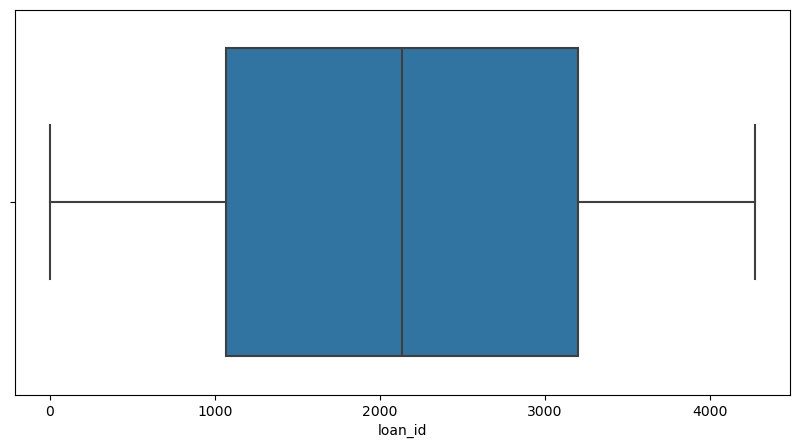

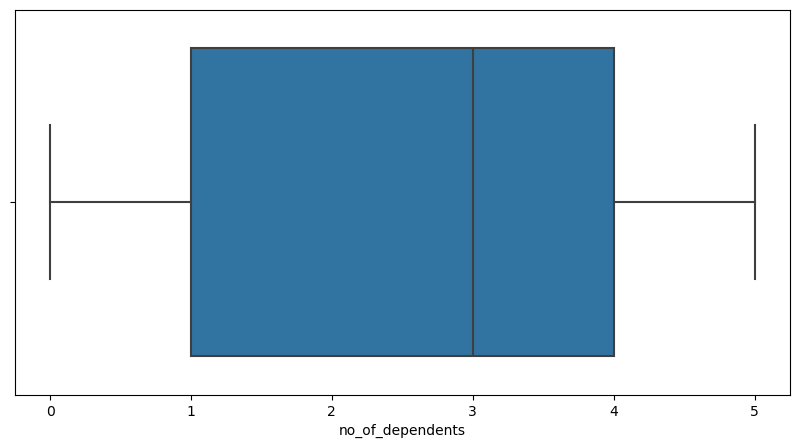

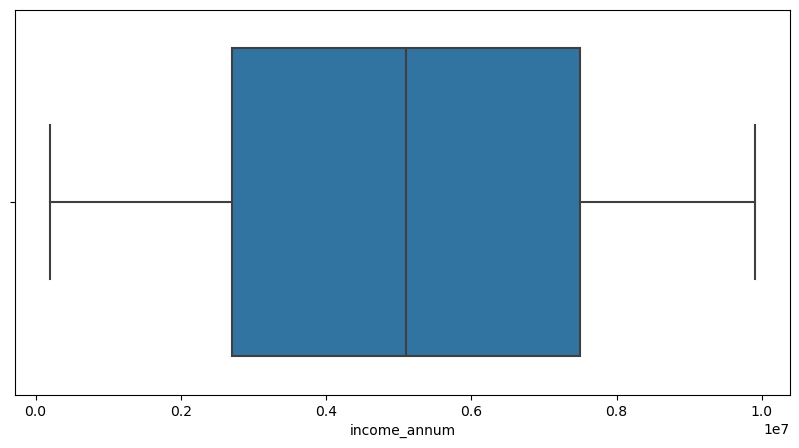

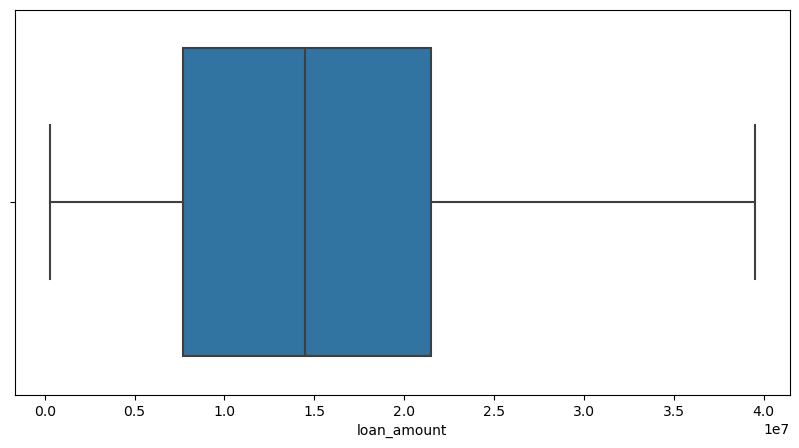

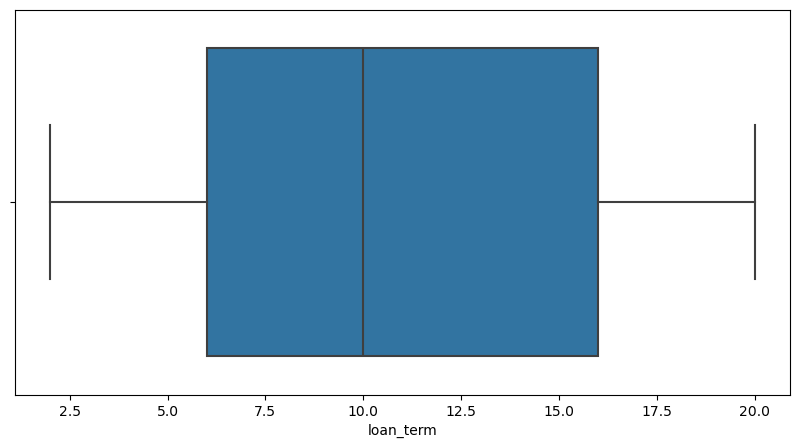

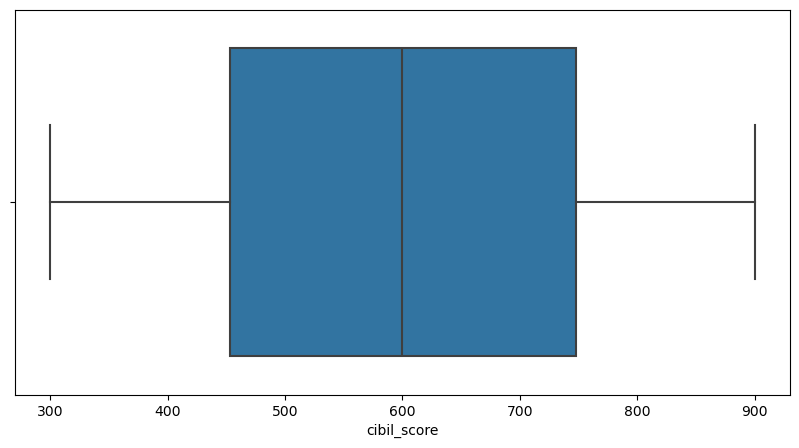

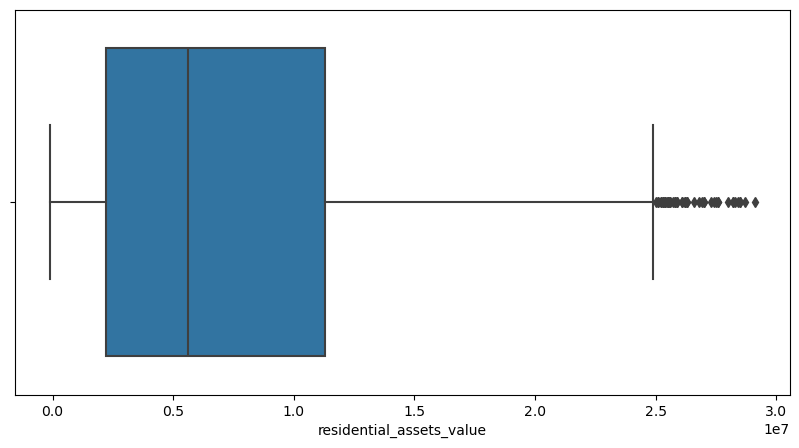

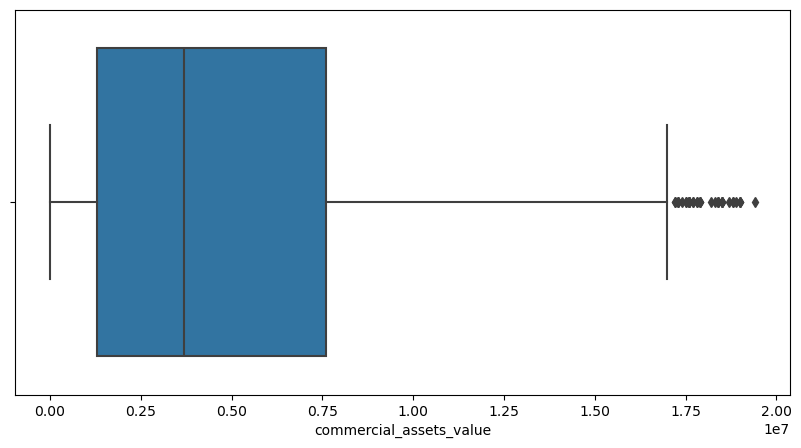

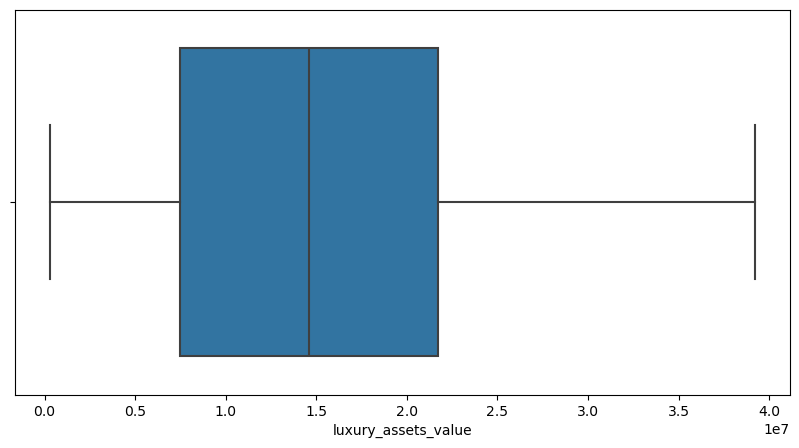

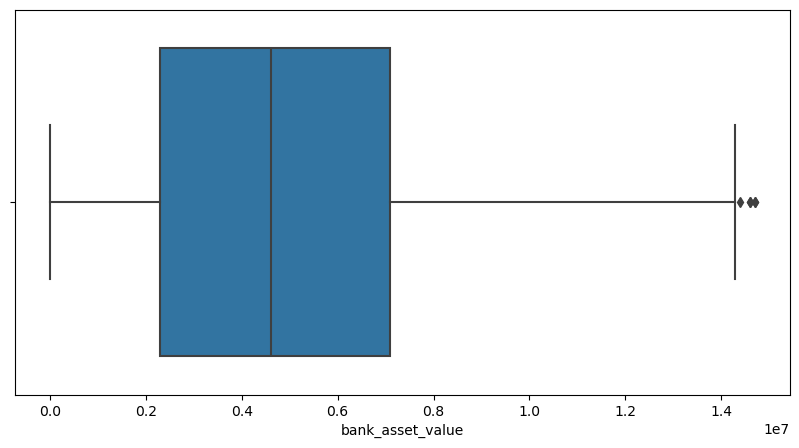

In [44]:
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data, x= col)

In [24]:
num_col

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [8]:
outlier_col = ['residential_assets_value','commercial_assets_value','bank_asset_value']

In [29]:
print("gfdghafjahfdgklsdjglfdkhlgjl;kghl;kl\
sdhgfhjsgkjfdhsaglkdjflk")

gfdghafjahfdgklsdjglfdkhlgjl;kghl;klsdhgfhjsgkjfdhsaglkdjflk


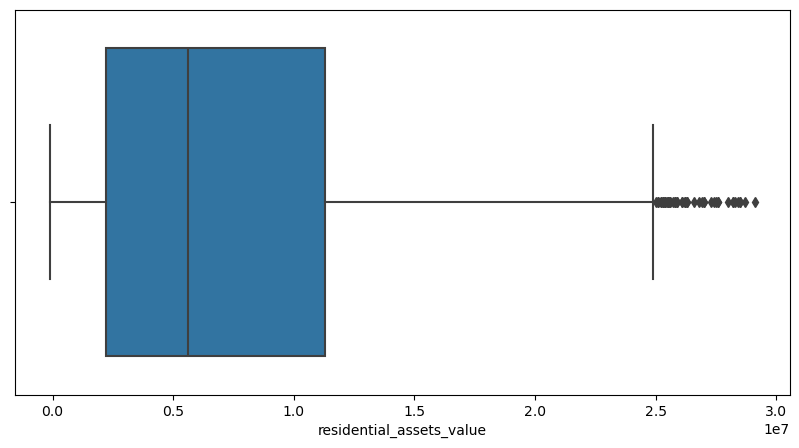

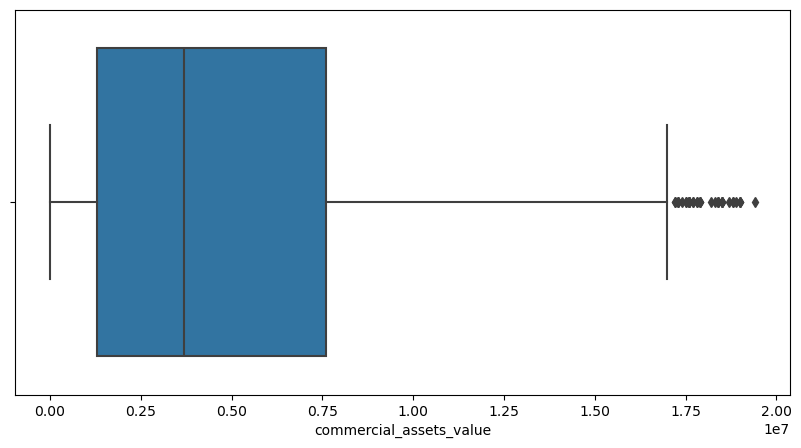

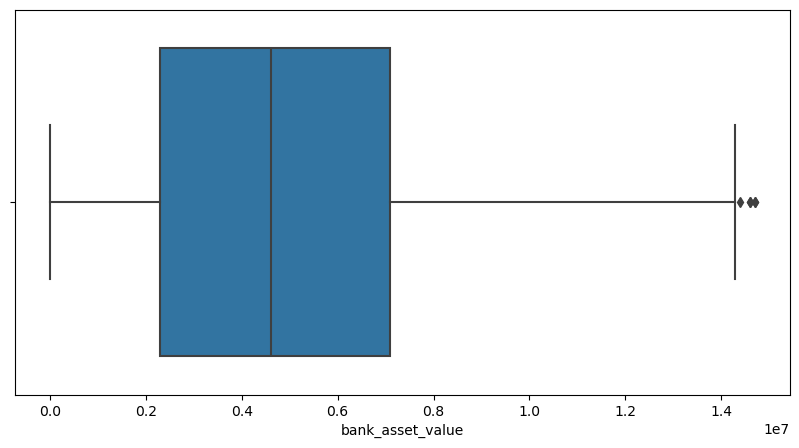

In [9]:
for col in outlier_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data, x= col)

In [10]:
data[outlier_col].describe().T

,count,mean,std,min,25%,50%,75%,max
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [11]:
for col in outlier_col:
    data[col] = data[col]/10000

In [12]:
data[outlier_col].describe().T

,count,mean,std,min,25%,50%,75%,max
residential_assets_value,4269.0,747.261654,650.363659,-10.0,220.0,560.0,1130.0,2910.0
commercial_assets_value,4269.0,497.315531,438.896609,0.0,130.0,370.0,760.0,1940.0
bank_asset_value,4269.0,497.669243,325.018531,0.0,230.0,460.0,710.0,1470.0


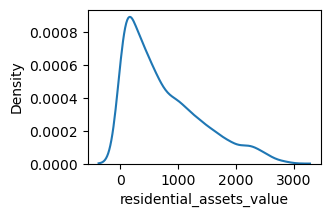

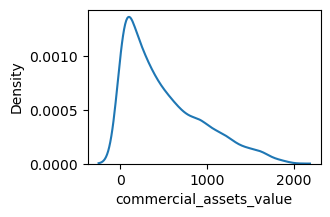

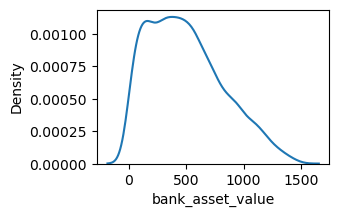

In [9]:
for col in outlier_col:
    plt.figure(figsize=(3,2))
    sns.kdeplot(data[col])

# Handling Outliers

# Handle Outliers:
- Removal: You can choose to remove the data points that are identified as outliers.

- Transformation: You can apply transformations to the data to reduce the impact of outliers (e.g., log transformation).

- Capping: You can cap the extreme values at a certain threshold.

- Imputation: You can replace outliers with more representative values (e.g., mean, median) if appropriate.

# Outlier Detection using Boundary Values
- Boundary Values
(mean (+or-) 3*std_dev)

In [51]:
for col in outlier_col:
    print(f'Upper Boundary Value for {col} : {round(data[col].mean()+3*data[col].std(),0)}')
    print(f'Lower Boundary Value for {col} : {data[col].mean()-3*data[col].std()}')
    print("*"*80)

Upper Boundary Value for residential_assets_value : 2698.0
Lower Boundary Value for residential_assets_value : -1203.829322516142
********************************************************************************
Upper Boundary Value for commercial_assets_value : 1814.0
Lower Boundary Value for commercial_assets_value : -819.3742963223152
********************************************************************************
Upper Boundary Value for bank_asset_value : 1473.0
Lower Boundary Value for bank_asset_value : -477.38634832618567
********************************************************************************


In [10]:
def upper_lower_limit(col):
    upper_limit=round(data[col].mean()+3*data[col].std(),0)
    lower_limit=round(data[col].mean()-3*data[col].std(),0)
    return upper_limit,lower_limit

In [53]:
outlier_col

['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

In [12]:
rav_upper,rav_lower=upper_lower_limit('residential_assets_value')

In [60]:
rav_index=data[(data['residential_assets_value']>rav_upper)|(data['residential_assets_value']<rav_lower)].index

In [61]:
rav_index

Index([ 714,  892,  905,  987, 1468, 1591, 1965, 1997, 2318, 2586, 2927, 3119,
       3234, 3782, 4042, 4074],
      dtype='int64')

In [59]:
df = data.copy()

In [62]:
df.shape

(4269, 13)

In [63]:
trim_rav = df.drop(rav_index,axis=0)

In [64]:
trim_rav.shape

(4253, 13)

<Axes: xlabel='residential_assets_value'>

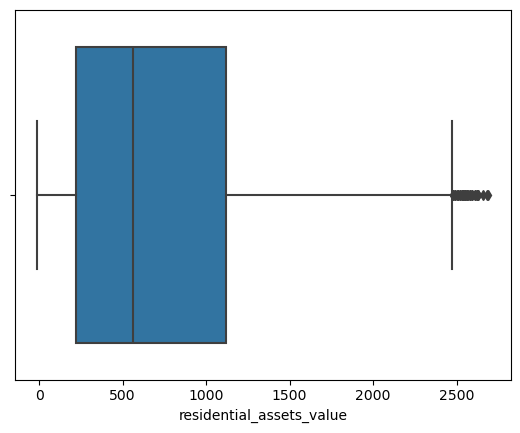

In [65]:
sns.boxplot(trim_rav,x='residential_assets_value')

In [66]:
l = [1,2,4,7,10,20,100,1000,2000]

In [11]:
cav_upper,cav_lower=upper_lower_limit('commercial_assets_value')

In [68]:
cav_index=data[(data['commercial_assets_value']>cav_upper)|(data['commercial_assets_value']<cav_lower)].index

In [73]:
cav_index

Index([ 157,  258,  367,  554,  895, 1029, 1254, 1272, 1304, 1761, 1768, 2914,
       2940, 3000, 3439, 3790, 3882],
      dtype='int64')

In [70]:
trim_cav = df.drop(cav_index,axis=0)

In [71]:
trim_cav.shape

(4252, 13)

<Axes: xlabel='commercial_assets_value'>

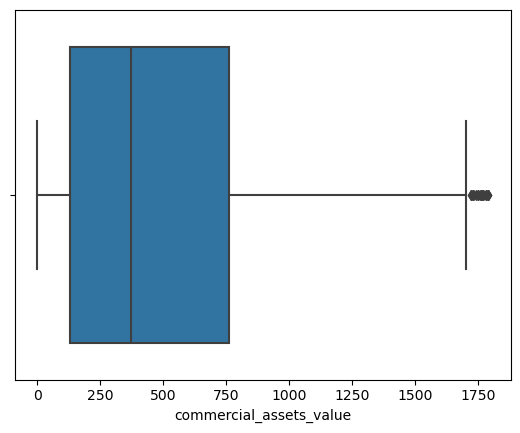

In [74]:
sns.boxplot(trim_cav,x='commercial_assets_value')

In [75]:
bav_upper,bav_lower=upper_lower_limit('bank_asset_value')

In [77]:
bav_index=data[(data['bank_asset_value']>bav_upper)|(data['bank_asset_value']<bav_lower)].index

In [80]:
bav_index

Index([], dtype='int64')

# Capping

In [17]:
df=data.copy()

In [13]:
rav_lower,rav_upper

(-1204.0, 2698.0)

In [16]:
df['residential_assets_value']= np.where(df['residential_assets_value']>rav_upper,rav_upper,
                                        np.where(df['residential_assets_value']<rav_lower,rav_lower,
                                                df['residential_assets_value']))

<Axes: xlabel='residential_assets_value'>

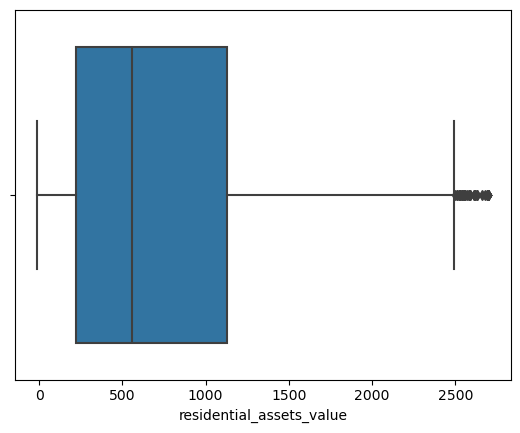

In [17]:
sns.boxplot(x=df['residential_assets_value'])

In [18]:
df['commercial_assets_value']= np.where(df['commercial_assets_value']>cav_upper,cav_upper,
                                        np.where(df['commercial_assets_value']<cav_lower,cav_lower,
                                                df['commercial_assets_value']))

In [28]:
data[data['commercial_assets_value']<cav_lower].shape

(0, 13)

<Axes: xlabel='commercial_assets_value'>

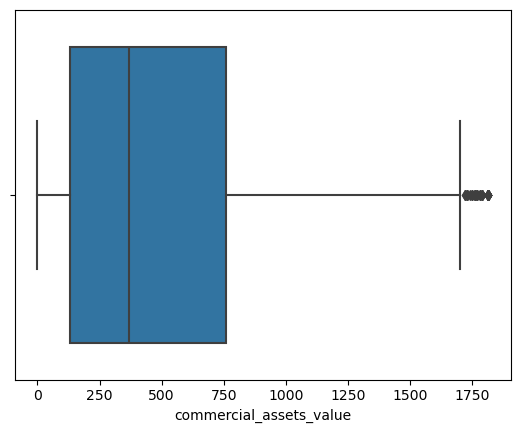

In [19]:
sns.boxplot(x=df['commercial_assets_value'])

<Axes: xlabel='commercial_assets_value', ylabel='Density'>

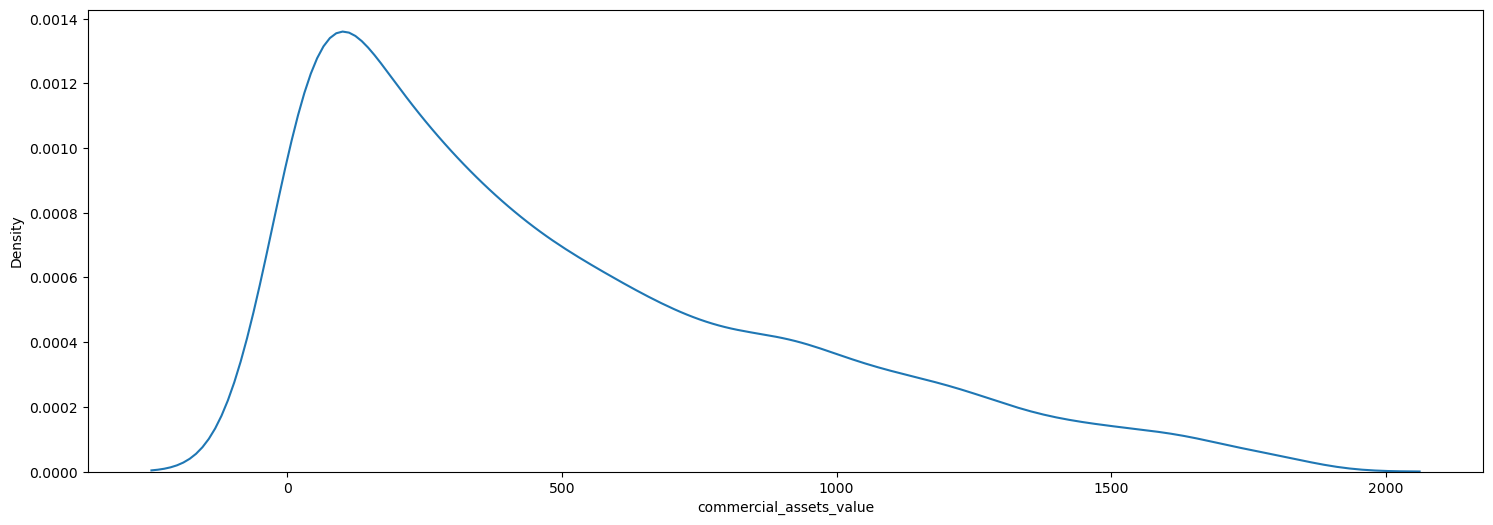

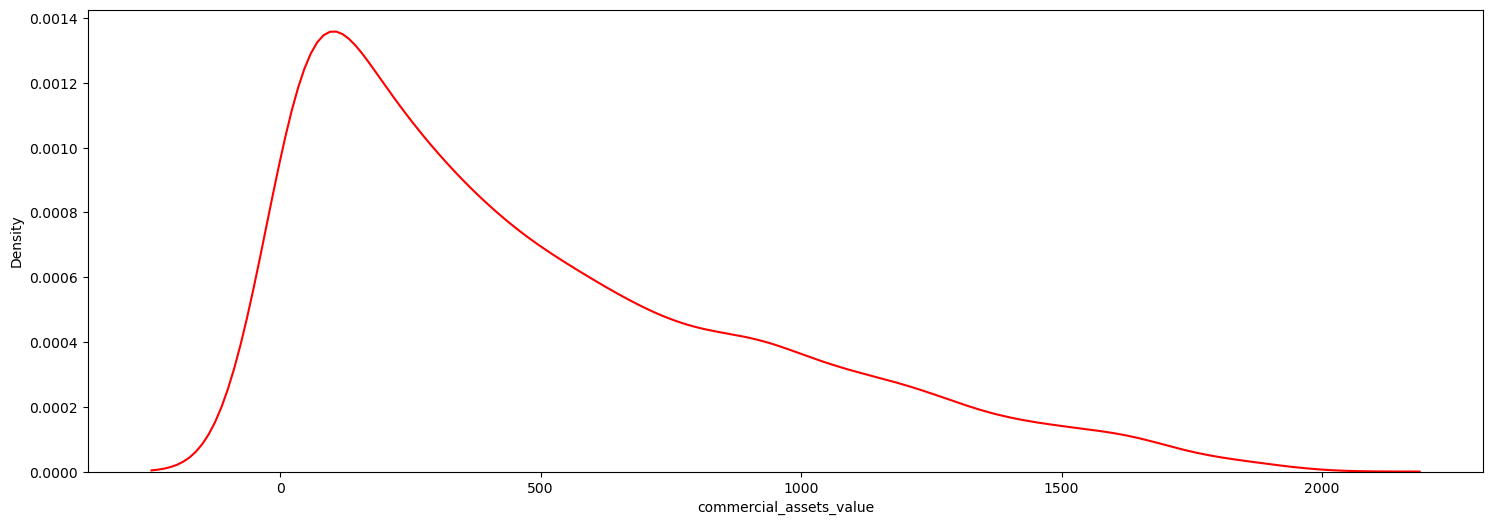

In [22]:
plt.figure(figsize=(18,6))
sns.kdeplot(df['commercial_assets_value'])
plt.figure(figsize=(18,6))
sns.kdeplot(data['commercial_assets_value'],color='red')

# Outlier Detection using Z-score 

### This technique is only used when the data is <u>Normally Distributed</u>

##### But for the sake of learning the technique, we will use this technique on the above columns. 

![image.png](attachment:image.png)


#### We will only consider values with z-score between -3 and 3 (there maybe situations where this range might change on the context of the data)

<i>The range of valid Z-scores (-3 to 3) is a general guideline commonly used in the context of the Z-score method for identifying outliers. However, this range is not a strict rule and can be adjusted based on the specific characteristics and context of the data.<br><br>
The choice of the range (-3 to 3) is somewhat arbitrary and stems from the empirical rule (also known as the 68-95-99.7 rule) for normally distributed data, where:</i>

__About 68% of data falls within 1 standard deviation from the mean.<br><br>
About 95% of data falls within 2 standard deviations from the mean.<br><br>
About 99.7% of data falls within 3 standard deviations from the mean.<br><br>
This rule is often used as a guideline to identify outliers. However, in practice, data may not always follow a perfect normal distribution, and the concept of what constitutes an "outlier" can vary based on the domain and context of the data analysis.__

<i>In some cases, you might want to use a more lenient or more strict range of Z-scores based on your specific knowledge of the data and the problem you're trying to solve. For example, if you're working with medical data where extreme values are particularly relevant, you might choose a larger Z-score threshold to capture potential anomalies.

Ultimately, the choice of the Z-score threshold depends on your understanding of the data and the goals of your analysis. It's a good practice to visualize the data, assess its distribution, and consider the domain knowledge before determining a suitable range for identifying outliers.</i>

### since the graph is one tailed on the upper side we are calculating positive zscore value

In [18]:
df['z_rav']=abs((df['residential_assets_value']-df['residential_assets_value'].mean())/df['residential_assets_value'].std())

In [19]:
df['z_rav']

0       0.779966
1       0.733838
2       0.057294
3       1.649444
4       0.757635
          ...   
4264    0.718462
4265    0.503198
4266    0.964478
4267    0.111843
4268    1.587940
Name: z_rav, Length: 4269, dtype: float64

<Axes: xlabel='z_rav', ylabel='Density'>

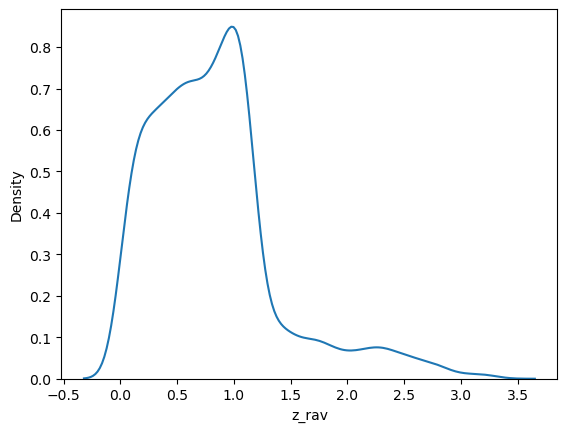

In [20]:
sns.kdeplot(x=df['z_rav'])

In [21]:
trimmed_df = df[(df['z_rav']<2.5)]

In [22]:
trimmed_df.shape

(4175, 14)

In [23]:
df.shape

(4269, 14)

<Axes: xlabel='residential_assets_value', ylabel='Density'>

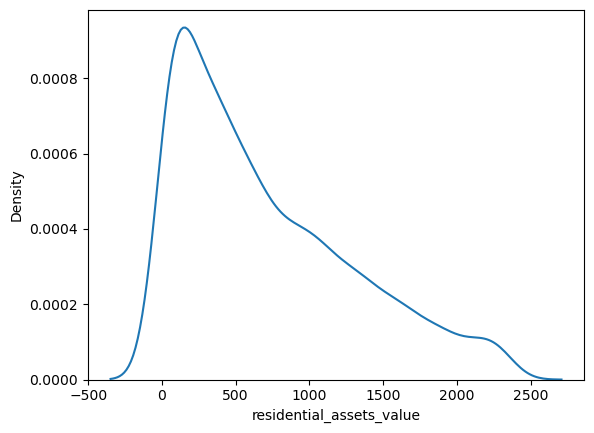

In [24]:
sns.kdeplot(x=trimmed_df['residential_assets_value'])

<Axes: xlabel='residential_assets_value'>

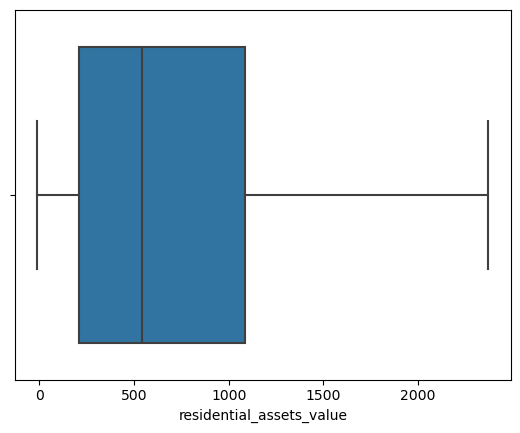

In [25]:
sns.boxplot(x=trimmed_df['residential_assets_value'])

In [26]:
df['z_cav']= abs((df['commercial_assets_value']-df['commercial_assets_value'].mean())/df['commercial_assets_value'].std())

In [ ]:
 upper range calculation:
df['z_cav'].mean() + 3*df['z_cav'].std() = 2.5

In [27]:
trimmed_df=df[df['z_cav']<2.5]

In [28]:
trimmed_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,z_rav,z_cav
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,0.733838,0.631847
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,0.057294,0.107806
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,1.649444,0.381219
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,0.757635,0.735218
5,6,0,Graduate,Yes,4800000,13500000,10,319,680.0,830.0,13700000,510.0,Rejected,0.103422,0.758002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,280.0,50.0,3300000,80.0,Rejected,0.718462,1.019182
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,420.0,290.0,11000000,190.0,Approved,0.503198,0.472356
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,120.0,1240.0,18100000,730.0,Rejected,0.964478,1.692163
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,820.0,70.0,14100000,580.0,Approved,0.111843,0.973613


In [29]:
df['commercial_assets_value']

0       1760.0
1        220.0
2        450.0
3        330.0
4        820.0
         ...  
4264      50.0
4265     290.0
4266    1240.0
4267      70.0
4268    1180.0
Name: commercial_assets_value, Length: 4269, dtype: float64

<Axes: xlabel='commercial_assets_value', ylabel='Density'>

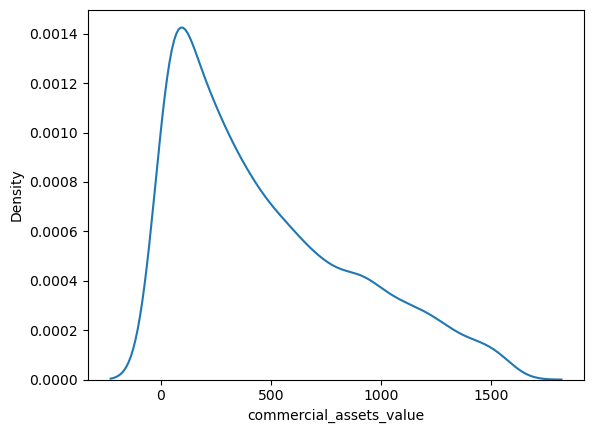

In [30]:
sns.kdeplot(x=trimmed_df['commercial_assets_value'])

<Axes: xlabel='commercial_assets_value'>

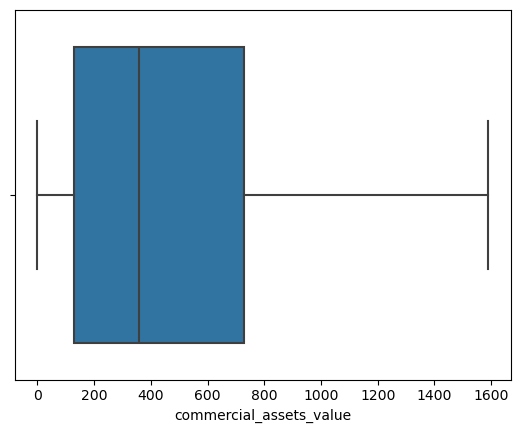

In [31]:
sns.boxplot(x=trimmed_df['commercial_assets_value'])

In [45]:
df['z_bav']= abs((df['bank_asset_value']-df['bank_asset_value'].mean())/df['bank_asset_value'].std())

In [46]:
trimmed_df=df[df['z_bav']<2.5]

In [47]:
trimmed_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,z_rav,z_cav,z_bav
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,0.779966,2.876952,0.930195
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,0.733838,0.631847,0.515876
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,0.057294,0.107806,2.407034
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,1.649444,0.381219,0.899428
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,0.757635,0.735218,0.007171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,280.0,50.0,3300000,80.0,Rejected,0.718462,1.019182,1.285063
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,420.0,290.0,11000000,190.0,Approved,0.503198,0.472356,0.946621
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,120.0,1240.0,18100000,730.0,Rejected,0.964478,1.692163,0.714823
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,820.0,70.0,14100000,580.0,Approved,0.111843,0.973613,0.253311


<Axes: xlabel='bank_asset_value'>

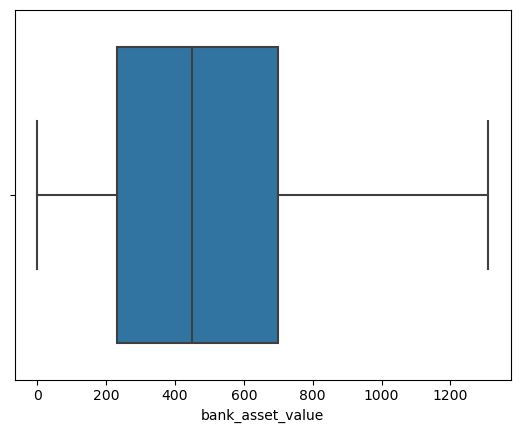

In [48]:
sns.boxplot(x=trimmed_df['bank_asset_value'])

# Capping

In [33]:
cap_df = df.copy()

In [36]:
cap_df['residential_assets_value']=np.where(cap_df['z_rav']>2.5,cap_df['z_rav'].max(),cap_df['residential_assets_value'])

In [37]:
cap_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,z_rav,z_cav
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,0.779966,2.876952
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,0.733838,0.631847
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,0.057294,0.107806
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,1.649444,0.381219
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,0.757635,0.735218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,280.0,50.0,3300000,80.0,Rejected,0.718462,1.019182
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,420.0,290.0,11000000,190.0,Approved,0.503198,0.472356
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,120.0,1240.0,18100000,730.0,Rejected,0.964478,1.692163
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,820.0,70.0,14100000,580.0,Approved,0.111843,0.973613


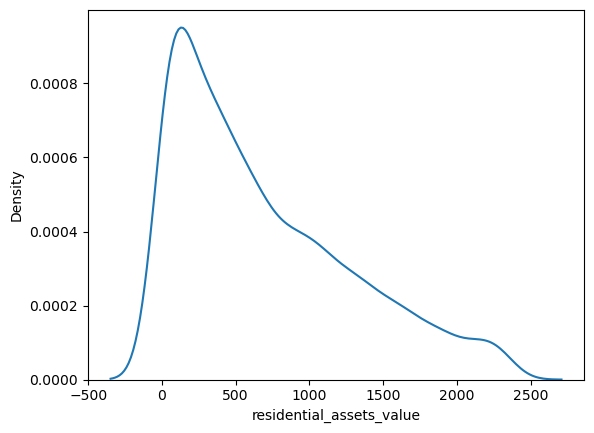

In [43]:
sns.kdeplot(x=cap_df['residential_assets_value'])
plt.show()

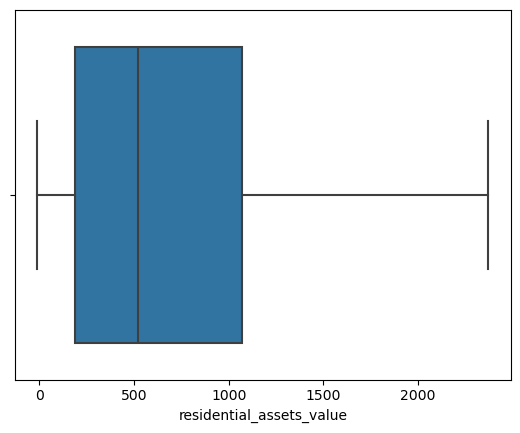

In [44]:
sns.boxplot(x=cap_df['residential_assets_value'])
plt.show()

# IQR method 

The Interquartile Range (IQR) method is another technique for identifying and handling outliers in a dataset. It's based on the distribution of data within the interquartile range, which is a measure of the spread of the middle 50% of the data. The IQR method is particularly useful for datasets that might not follow a normal distribution and where the concept of outliers might be different from that of normally distributed data.

Here's how the IQR method works:

Calculate Quartiles:

* The first quartile (Q1) is the value below which 25% of the data falls.
* The third quartile (Q3) is the value below which 75% of the data falls.

Calculate Interquartile Range (IQR):

* The interquartile range (IQR) is the difference between the third quartile (Q3) and the first quartile (Q1): IQR = Q3 - Q1.

Identify Outliers:

* Outliers are often defined as values that are below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR).

In [49]:
def IQR_cal(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr = q3-q1
    u_fence=q3+1.5*iqr
    l_fence=q1-1.5*iqr
    return u_fence,l_fence

In [128]:
ulimit,llimit=IQR_cal('residential_assets_value')

In [51]:
ulimit

2495.0

In [52]:
llimit

-1145.0

In [55]:
trim_df = df[(df['residential_assets_value']<=ulimit)&(df['residential_assets_value']>=llimit)]

In [56]:
trim_df.shape

(4217, 16)

<Axes: xlabel='residential_assets_value'>

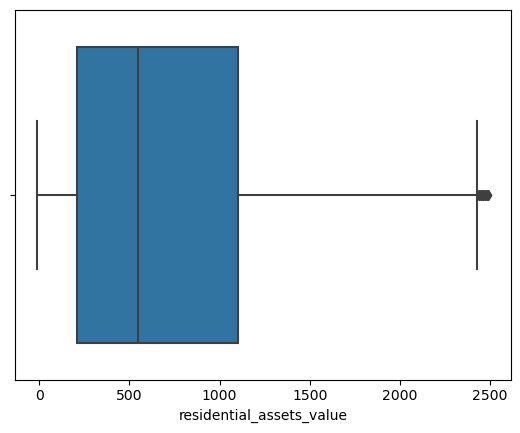

In [57]:
sns.boxplot(x=trim_df['residential_assets_value'])

In [65]:
ulimit1,llimit1=IQR_cal('commercial_assets_value')

In [66]:
ulimit1

1705.0

In [67]:
llimit1

-815.0

In [61]:
trim_df = df[(df['commercial_assets_value']<=ulimit1)&(df['commercial_assets_value']>=llimit1)]

<Axes: xlabel='commercial_assets_value'>

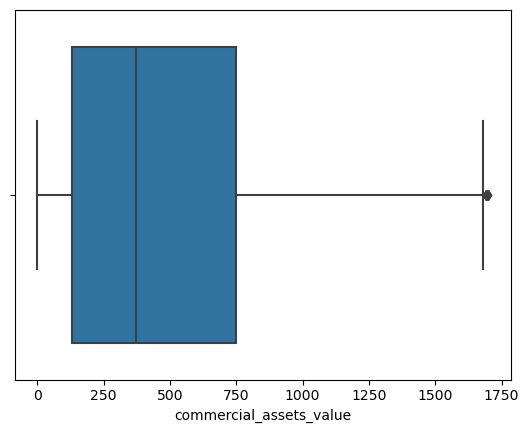

In [62]:
sns.boxplot(x=trim_df['commercial_assets_value'])

# capping

In [63]:
new_df_cap = df.copy()

In [68]:
new_df_cap['residential_assets_value'] = np.where(new_df_cap['residential_assets_value'] >ulimit,ulimit,
                                        np.where(new_df_cap['residential_assets_value'] <llimit,llimit,
                                               new_df_cap['residential_assets_value'] ))

<Axes: xlabel='residential_assets_value'>

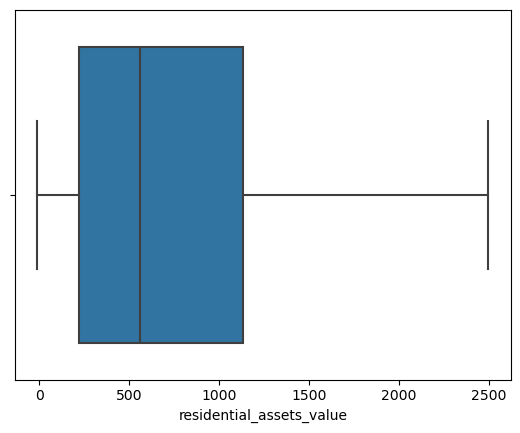

In [69]:
sns.boxplot(x=new_df_cap['residential_assets_value'])

# Percentile Method
The percentile method is another approach to handling outliers in a dataset. Instead of relying on assumptions about the distribution of data, this method directly examines percentiles to identify values that are significantly distant from the rest of the data. This method is versatile and can be used with data that doesn't follow a normal distribution.

Here's how the percentile method works:

Calculate Percentiles:

Choose a lower percentile (e.g., 5th percentile) and an upper percentile (e.g., 95th percentile) that define the range of values you consider "normal."

Calculate the value corresponding to the chosen percentiles.

Identify Outliers:

Values below the lower percentile or above the upper percentile can be considered outliers.

Handle Outliers:

Similar to other outlier methods, outliers can be handled through removal, transformation, capping, or imputation.

In [70]:
lower_percentile = 5
upper_percentile = 95

In [73]:
df['residential_assets_value'].quantile(0.05)
np.percentile(df['residential_assets_value'],5)

30.0

In [74]:
# Calculate percentiles
lower_threshold = df['residential_assets_value'].quantile(lower_percentile / 100)
upper_threshold = df['residential_assets_value'].quantile(upper_percentile / 100)

# Trimming

In [75]:
outliers = df[(df['residential_assets_value'] < lower_threshold) | (df['residential_assets_value'] > upper_threshold)]

trimmed_df = df[(df['residential_assets_value'] >= lower_threshold) & (df['residential_assets_value'] <= upper_threshold)]


In [76]:
outliers.shape

(397, 16)

In [77]:
df.shape[0] - trimmed_df.shape[0]

397

<Axes: xlabel='residential_assets_value'>

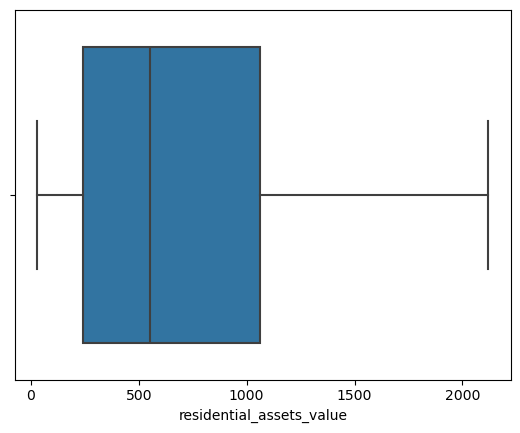

In [78]:
sns.boxplot(x=trimmed_df['residential_assets_value'])

# Capping

In [79]:
new_df_cap = df.copy()

new_df_cap['residential_assets_value'] = np.where(
    new_df_cap['residential_assets_value'] > upper_threshold,
    upper_threshold,
    np.where(
        new_df_cap['residential_assets_value'] < lower_threshold,
        lower_threshold,
        new_df_cap['residential_assets_value']
    )
)

<Axes: xlabel='residential_assets_value'>

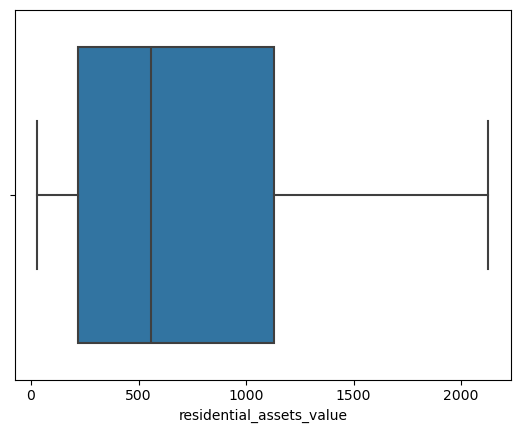

In [80]:
sns.boxplot(x=new_df_cap['residential_assets_value'])

# Using pandas.clip() method to cap:

In [87]:
new_df_cap = df.copy()

In [88]:
# Calculate percentiles
lower_threshold = df['commercial_assets_value'].quantile(lower_percentile / 100)
upper_threshold = df['commercial_assets_value'].quantile(upper_percentile / 100)

In [90]:
upper_threshold

1390.0

In [91]:
new_df_cap['commercial_assets_value']=new_df_cap['commercial_assets_value'].clip(lower_threshold,upper_threshold)

<Axes: xlabel='commercial_assets_value'>

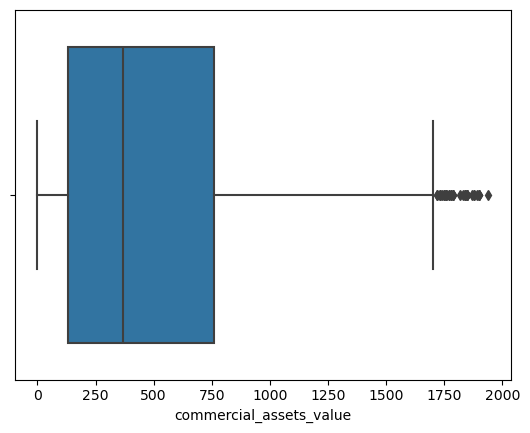

In [92]:
sns.boxplot(x=df['commercial_assets_value'])

<Axes: xlabel='commercial_assets_value'>

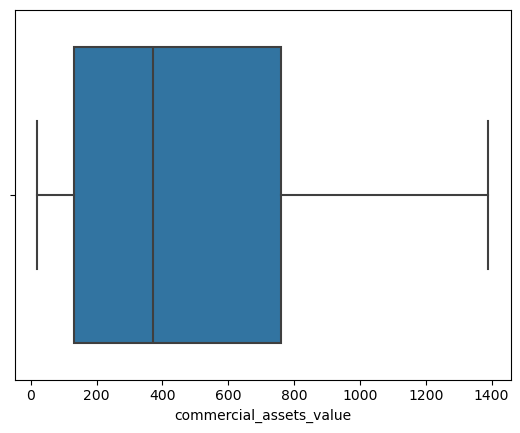

In [93]:
sns.boxplot(x=new_df_cap['commercial_assets_value'])

# Mathematical Transformation

## Log Transformation:

- Use when data is right-skewed (positively skewed).
- Applies a logarithmic function (e.g., natural logarithm) to the data.
- Reduces the impact of extreme values while preserving the relative ordering of data points.

## Square Root Transformation:

- Appropriate for right-skewed data.
- Reduces the influence of outliers.

## Square Transformation:

- Appropriate for left-skewed data.
- Reduces the influence of outliers.

## Box-Cox Transformation:

- for positive skewed
- Suitable for data that doesn't follow a simple power-law distribution.
- Box-Cox is a family of transformations parameterized by a lambda (λ) value, which you can optimize to find the best transformation for your data.

## Yeo-Johnson Transformation:

- The Yeo-Johnson transformation is a variation of the Box-Cox transformation that can be used to stabilize the variance and make data more closely follow a normal distribution. 
- It is particularly useful when dealing with data that contains both positive and negative values, as opposed to the original Box-Cox transformation, which requires strictly positive values.

- The Yeo-Johnson transformation is defined as:image.png

In [95]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected


In [96]:
outlier_col

['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

In [97]:
def plot_col(df,col1,col2):
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    sns.kdeplot(df[col1])

    plt.subplot(2,2,2)
    sns.boxplot(df[col1])

    plt.subplot(2,2,3)
    sns.kdeplot(df[col2])

    plt.subplot(2,2,4)
    sns.boxplot(df[col2])

    plt.show()

# Log transformation

In [98]:
df['residential_assets_value'].describe()

count    4269.000000
mean      747.261654
std       650.363659
min       -10.000000
25%       220.000000
50%       560.000000
75%      1130.000000
max      2910.000000
Name: residential_assets_value, dtype: float64

<Axes: >

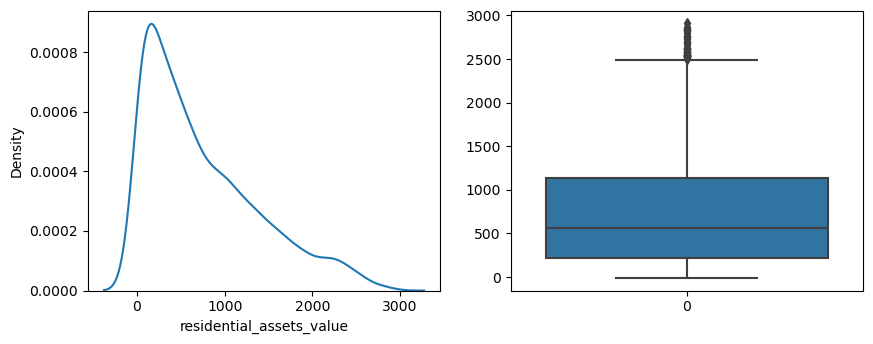

In [99]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.kdeplot(df['residential_assets_value'])

plt.subplot(2,2,2)
sns.boxplot(df['residential_assets_value'])

In [100]:
# np.log1p()- calculates natural log of a number ie. log(1+x)
df['rav_log'] = np.log1p(df['residential_assets_value'])

In [101]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,z_rav,z_cav,z_bav,rav_log
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,0.779966,2.876952,0.930195,5.484797
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,0.733838,0.631847,0.515876,5.602119
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,0.057294,0.107806,2.407034,6.566672
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,1.649444,0.381219,0.899428,7.507141
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,0.757635,0.735218,0.007171,7.123673


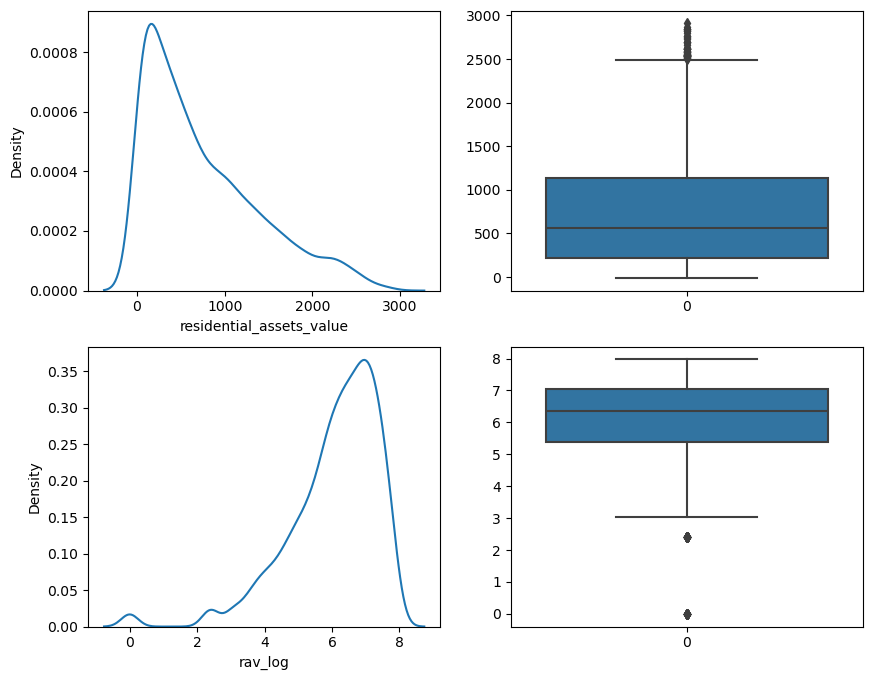

In [102]:
plot_col(df,'residential_assets_value','rav_log')

# Square Root

In [104]:
sns.boxplot(data=df1,x='box_cox')

In [105]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,z_rav,z_cav,z_bav,rav_log,sqrt_rav
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,0.779966,2.876952,0.930195,5.484797,15.491933
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,0.733838,0.631847,0.515876,5.602119,16.431677
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,0.057294,0.107806,2.407034,6.566672,26.645825
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,1.649444,0.381219,0.899428,7.507141,42.661458
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,0.757635,0.735218,0.007171,7.123673,35.213634


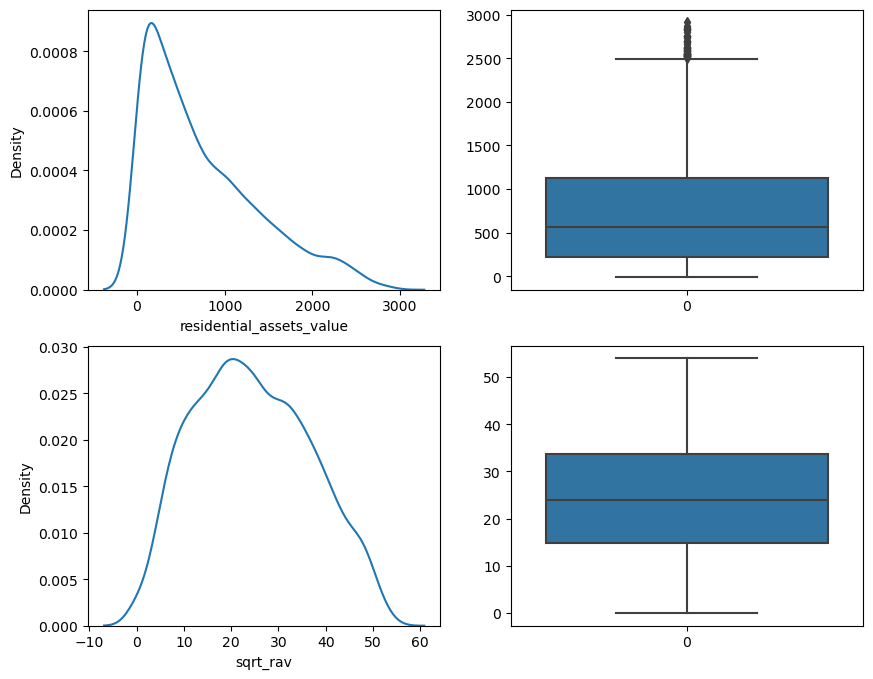

In [106]:
plot_col(df,'residential_assets_value','sqrt_rav')

In [107]:
df['sqrt_cav']=np.sqrt(df['commercial_assets_value'])

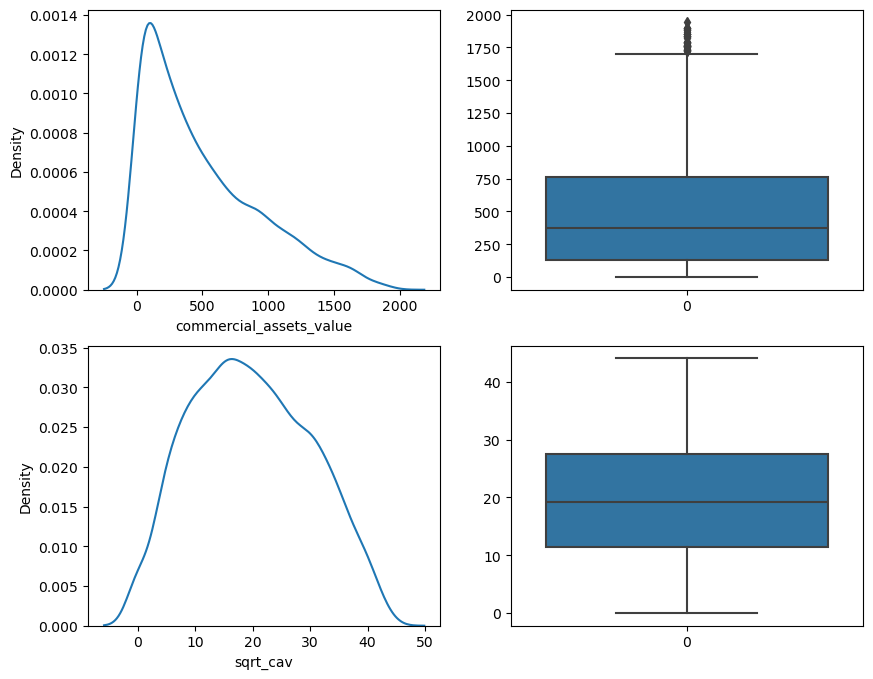

In [108]:
plot_col(df,'commercial_assets_value','sqrt_cav')

In [109]:
df['sqrt_bav']=np.sqrt(df['bank_asset_value'])

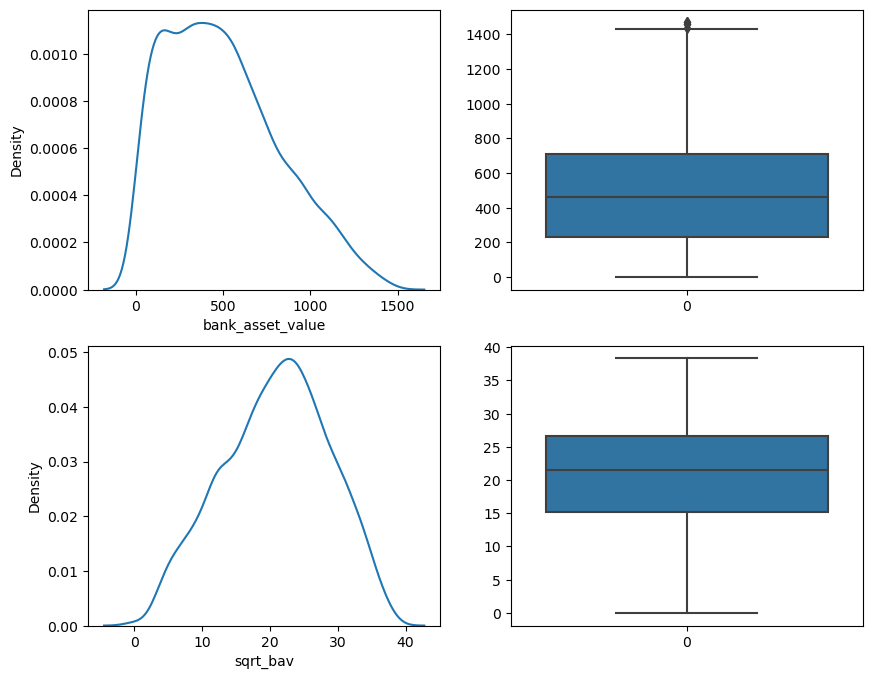

In [110]:
plot_col(df,'bank_asset_value','sqrt_bav')

# Square Transformation

In [111]:
df['sq_rav']= np.square(df['residential_assets_value'])

In [112]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,sqrt_rav
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,15.491933
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,16.431677
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,26.645825
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,42.661458
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,35.213634


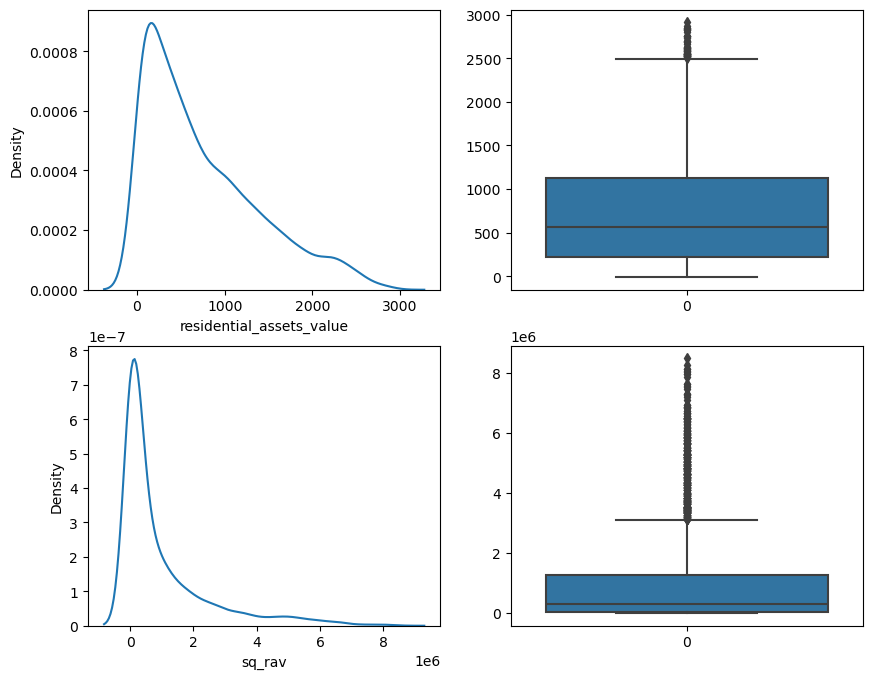

In [114]:
plot_col(df,'residential_assets_value','sq_rav')

In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
df1 = data.copy()

In [117]:
pt = PowerTransformer()

In [120]:
df1['yj_cav']=pt.fit_transform(df['commercial_assets_value'].values.reshape(-1,1))

In [122]:
df1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,sqrt_rav,yj_cav
0,1,2,Graduate,No,9600000,29900000,12,778,240.0,1760.0,22700000,800.0,Approved,15.491933,1.928953
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,270.0,220.0,8800000,330.0,Rejected,16.431677,-0.401439
2,3,3,Graduate,No,9100000,29700000,20,506,710.0,450.0,33300000,1280.0,Rejected,26.645825,0.213552
3,4,3,Graduate,No,8200000,30700000,8,467,1820.0,330.0,23300000,790.0,Rejected,42.661458,-0.072537
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,1240.0,820.0,29400000,500.0,Rejected,35.213634,0.866357


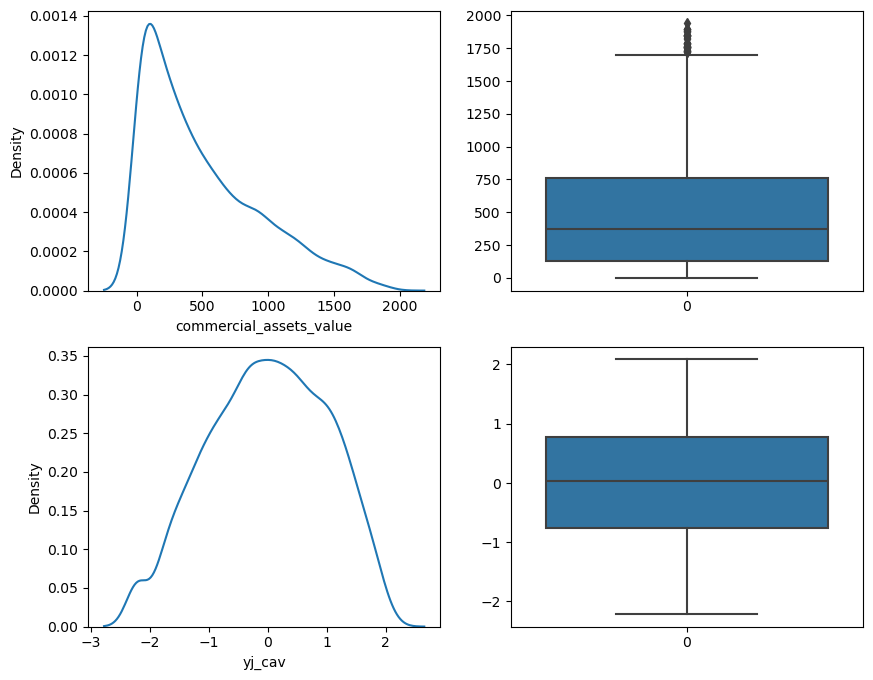

In [123]:
plot_col(df1,'commercial_assets_value','yj_cav')

In [139]:
pt = PowerTransformer(method='box-cox')
df1['bx_rav'] = pt.fit_transform(df1['residential_assets_value'].values.reshape(-1,1))

ValueError: The Box-Cox transformation can only be applied to strictly positive data

<Axes: xlabel='residential_assets_value'>

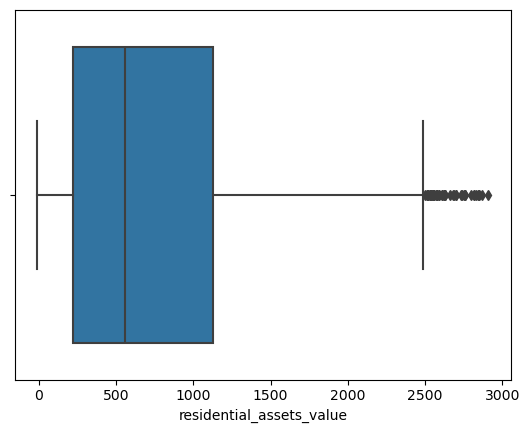

In [127]:
sns.boxplot(x=df1['residential_assets_value'])

In [138]:
df1[df1['residential_assets_value']<0]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,sqrt_rav,yj_cav
59,60,4,Not Graduate,Yes,5500000,18200000,16,797,-10.0,490.0,18600000,480.0,Approved,NaN,0.297850
196,197,4,Not Graduate,Yes,400000,1500000,2,669,-10.0,60.0,900000,50.0,Approved,NaN,-1.181864
559,560,2,Graduate,Yes,200000,500000,6,885,-10.0,0.0,300000,20.0,Rejected,NaN,-2.208573
702,703,4,Graduate,Yes,6300000,23900000,6,899,-10.0,1140.0,20600000,670.0,Approved,NaN,1.289321
737,738,2,Graduate,Yes,900000,2500000,16,458,-10.0,10.0,3200000,110.0,Rejected,NaN,-1.792819
784,785,0,Graduate,No,5000000,14400000,2,761,-10.0,730.0,12600000,450.0,Approved,NaN,0.728654
904,905,2,Graduate,No,4100000,14900000,12,571,-10.0,520.0,13000000,340.0,Approved,NaN,0.358221
1089,1090,3,Graduate,No,5100000,11000000,6,336,-10.0,580.0,11600000,750.0,Rejected,NaN,0.472580
1163,1164,2,Graduate,No,4500000,9100000,18,593,-10.0,60.0,12400000,250.0,Approved,NaN,-1.181864
1350,1351,5,Graduate,No,4000000,13700000,6,496,-10.0,140.0,15800000,370.0,Rejected,NaN,-0.715553
